## Exploring SMT

In [1]:
import numpy as np
from smt.utils.misc import compute_relative_error

from smt.problems import Rosenbrock
from smt.sampling_methods import LHS
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP, IDW, RBF, RMTC, RMTB
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.integrate import dblquad

### Finding the best rectangular domain of area 1 to integrate the hidden function

In [2]:
def hidden_function(x,y):
    return np.exp(-x**2-y**2)

def objective_function(x,y,l):
    return dblquad(hidden_function, x, x+l, y, y+1/l)[0]

### Sample with Latin Hypercube Sampling

In [3]:
sampling = LHS(xlimits=np.array([[-5,5],[-5,5],[0.1,5]]))

X = sampling(50)
Y = np.array([objective_function(x,y,z) for x,y,z in X])
[X[:5], Y[:5]]

[array([[-1.7  , -3.9  ,  3.971],
        [-4.3  ,  4.3  ,  2.403],
        [-4.7  , -4.1  ,  3.677],
        [ 1.3  ,  3.3  ,  2.599],
        [-0.3  ,  1.7  ,  2.305]]),
 array([3.31780896e-07, 6.69716410e-12, 6.39736632e-09, 1.48748359e-07,
        1.42078110e-02])]

### Training with Kriging

In [4]:
sm = KRG(theta0=[1e-2, 1e-2, 1e-2])
sm.set_training_values(X, Y)
sm.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 50
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  1.3634882


### Making predictions for squares

In [5]:
x, y = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
x_ = x.reshape([-1,1])
y_ = y.reshape([-1,1])
l = np.ones(x_.shape)
X_test = np.hstack([x_-0.5,y_-0.5,l])
Y_test = sm.predict_values(X_test).reshape(x.shape)

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 2500
   
   Predicting ...
   Predicting - done. Time (sec):  0.0205011
   
   Prediction time/pt. (sec) :  0.0000082
   


### Plotting the predictions

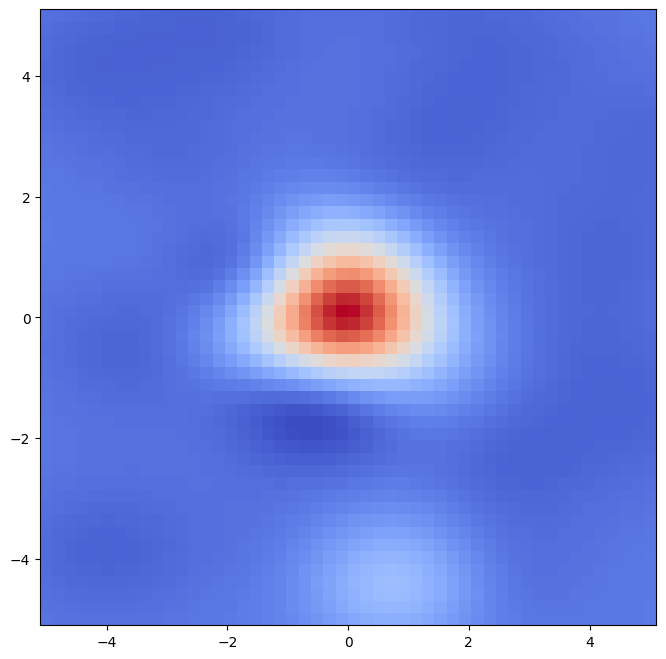

In [6]:
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.set_aspect('equal')
ax.pcolormesh(x, y, Y_test, cmap='coolwarm')
plt.show()